# Introduction to Qiskit and IBM Quantum Platform
#### Quantum Computing in Biotech, 6th July 2023

#### Presented by: Astri Cornish, IBM Quantum


In [5]:
# Automatically appears upon opening a python notebook

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

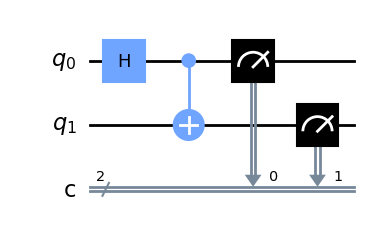

In [6]:
# Copied from IBM Quantum Composer

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0]) # h gate on 1st qubit
circuit.cx(qreg_q[0], qreg_q[1]) # control, target
circuit.measure(qreg_q[0], creg_c[0]) # measure qubit 1 onto classical bit 1
circuit.measure(qreg_q[1], creg_c[1]) # measure qubit 2 onto bit 2

circuit.draw()

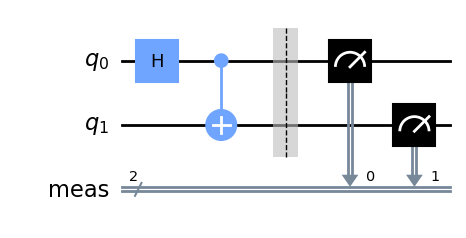

In [7]:
# Condensed notation
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

In [11]:
# Running on a simulator
from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(circuit) # shots = 1024 is the default
result = job.result() 
counts = result.get_counts() 
counts

{'00': 500, '11': 524}

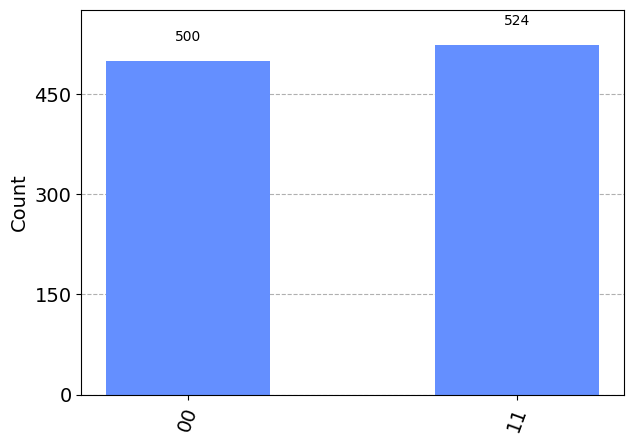

In [12]:
plot_histogram(counts)

In [ ]:
# Running on a real device
from qiskit_ibm_provider import IBMProvider, least_busy

provider = IBMProvider(instance='ibm-q/open/main')

# get the least busy backend 
real_backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 1 and
                                   not b.configuration().simulator and b.status().operational==True))

print(f"The least busy backend is: {real_backend.name}")

# Transpile to a circuit optimized for execution on a real machine backend and Execute it
circuit_transpiled = transpile(circuit, real_backend)

# submit the job
job = real_backend.run(circuit, shots = 1024)

# Monitoring our job
from qiskit_ibm_provider.job import job_monitor
print(f"Job ID: {job.job_id()}")
job_monitor(job)


The least busy backend is: ibmq_lima
Job ID: cih6igbu5mrpmcdhlrlg
Job Status: job is queued (5) [Est. wait time: 23 hrs 57 min]

In [ ]:
results = job.result()
counts = results.get_counts()
counts

{'00': 530, '01': 9, '10': 7, '11': 478}

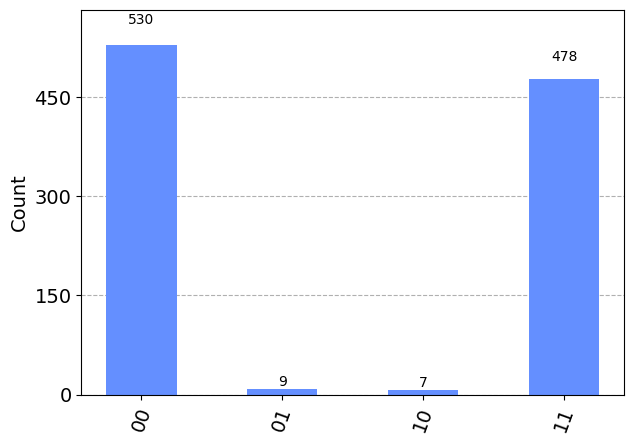

In [ ]:
plot_histogram(count)

In [ ]:
# what you will additionally need to run locally

IBMProvider.save_account(token="", overwrite=True) # get your token from the dashboard in the IBM Quantum Platform